# Network

Una network es un grafo G dirigido tal que cumple: <br>
1) Cada eje e tiene una capacidad C_e <br> 
2) Uno (o mas) verice es el Source. <br>
3) Uno o mas vertices son el sink <br><br>

Luego, en las redes se tienen trafico (que en general va de un source a un sink). El flujo a lo largo de un eje tiene que ser menor a la capacidad maxima que tiene el eje. f_e denota el flujo a lo largo del eje e <br>
Tambi'en, la suma de todos los flujos entrando a un vertice es igual a la suma de todos los flujos saliendo. <br><br> 

Tamaño de Flujo: Se calcula como $|f| = \sum\limits_{e \; out of source} f_e - \sum\limits_{e \; into sink} f_e$ donde $e$ representa ejes. Es decir, es la cantidad de flujo total creado en un source. O bien, se puede calcular similarmente usando solo sinks. <br> <br>

Problema de Maxflow: Dado un grafo G, cu'al es el mayor flujo que se puede tener?

##### Residual Network
La t'ecnica para resolver el problema de Maxflow es ir construyendo flujos de poco a poco, es decir, ir agragando flow del source hacia el sink. 
Por ejemplo, en esta imagen se fueron agregando los 3 flows  que se ven uno por uno. 
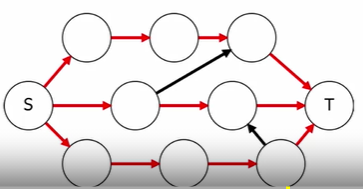
Sin embargo, puede tener un problema. 

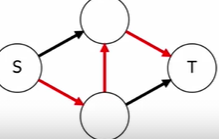
En esta imagen empezamos con un flow que no nos permite agregar otro (y eso que la solucion optima tiene un maxflow de 2). 

La forma de resolverlo es agregar este flow azul y pensar que se cancelan en el eje de enmedio. 
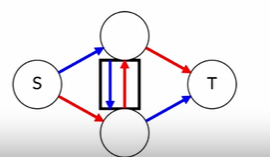
Entonces, pensando en que se cancelan, nos quedan los dos flows optimos. 

###### Residual Network: 
Si G es una red. Definimos la red residual como sigue. Para cada eje e, le definimos una capacidad de C_e - f_e y le definimos un eje en direccion opuesta con capacidad f_e (este es el eje imaginario que se puede usar para cancelar flows). <br>
Ejemplo:
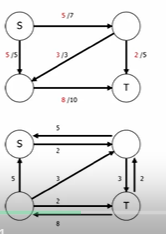

Dada una red G con flujo f. Cualquier flujo g en G_f se puede sumar al de f para crear un nuevo flujo en G (posiblemente m'as optimo como el del ejemplo de antes). En la red residual, los flujos en la misma direccion suman y en la direccion opuesta resta. <br>
Por ejemplo, aqu'i tenemos un flujo f y un flujo g en G_f (la red residual del flujo f) y tenemos la suma f+g
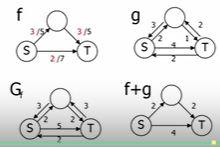

$\textbf{Teorema}$<br>
Dada una red G y un flujo f y su red residual G_f con un flujo g, entonces:<br>
1)f+g es un flujo en G  <br>
2)|f+g| = |f|+|g| <br>
3) Todos los flujos en G se pueden conseguir de esta forma para algun g flujo de G_f (para esta f fija).

#### Maxflow-mincut

Acotar por arriba: Podemos encontrar un bottleneck en el flow que nos ayude a acotar el maximo flow. Por ejemplo, si s'olo hay un total de 200 unidades llegando al unico sink, sabemos que el maximo flow est'a acotado por 200, sin importar lo que suceda en otras partes de la grafica, <br> <br> 

Def Corte: Dada una red G, un $\textbf{corte}$ C es un conjunto de vertices de G tal que C contiene a todos los Sources de G y a ningun sink. El tamano del cort'e est'a dado por $|C| = \sum\limits_{e \; out\; of \;C} C_e$. Es decir, es la cantidad total que sale del corte. 
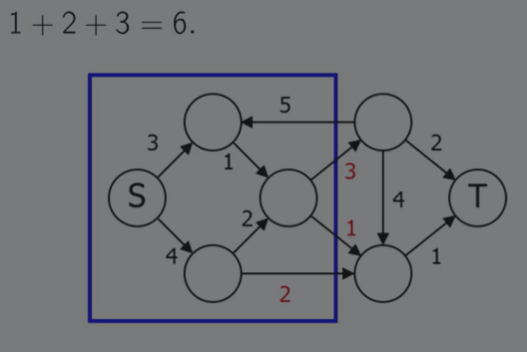

Lema: Dado un corte C, todo flow f cumple que |f| < |C|. Sale directo de la definicion de |f|.
Por lo que |C| es una cota superior al max flow, pero mejor a'un,<br> <br> 

$\textbf{Teorema:}$  Para cualquier Grafo G, se cumple que $\max\limits_{flows \; f} |f| = \min\limits_{cuts \; C} |C|$. Es decir, el corte mas chico da el flujo mayor.  
Dem:
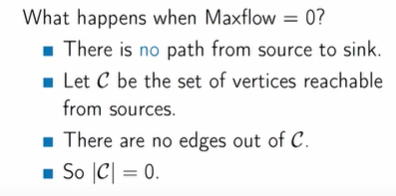

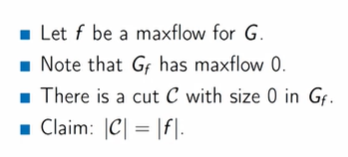

# Algoritmo de Ford-Fulkerson

Basicamente, el algoritmo consiste en empezar con un flow f=0 (un flow que ni sale del source) y luego  repetir: <br>
2) Calcular la red residual G_f <br>
3) Buscar un flow g en G_f <br>
4) Sumar f+g <br> <br>

Para saber cuando acabamos, si no existe un camino en G_f, entonces el flow maximo de G_f es 0. Como vimos antes, todo flow de G mejores que f se pueden conseguir sumand a f un flojo de G_f, pero en este caso, sumar este flujo de G_f no mejora nada, por ello, |f| es optimo. <br> 
Pero si s'i hay un camino g en G_f, entonces como dice el paso 4, podemos definir f+g y mejorar un poco el flujo.
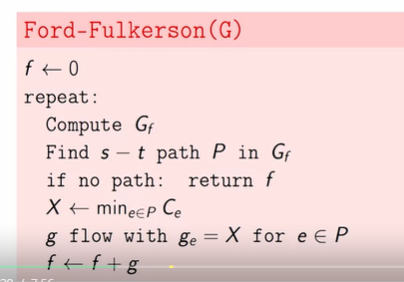

X es el la capacidad del minimo eje en el camino P en G_f. Y el flow g lo definimos de tal forma que valga X en todos los pasos. <br>

Lema: si una red tiene capacidades que son numeros enteros, entonces el flujo maximo es un numero entero. <br>
El tiempo es O(|E||f|) <br>
Hay que tomar en cuenta que encontrar el camino de s a t no se incluye en el algoritmo y es algo importante a tomar en cuenta para optimizarlo.

Ejemplo de una red en la que el algoritmo no es muy eficiente. 
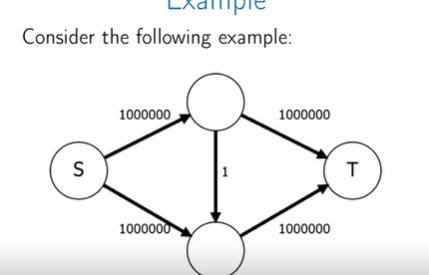
En esta red, empezamos com un flujo trivial f=0. Luego calculamos la red residual (que por ahora es igual a la red), luego buscamos un camino en el residual. Si dicho camino pasa por el eje 1, entonces el algoritmo nos dice que hay que agregar un flujo de 1 por este camino residual y sumar a f. Actualizamos f y ahora caluclamos de nuevo la red residual y nuevamente buscamos un flow g en G_f, .... etc. El problema es que como el camino g incluia el 1, s'olo manda un flujo de 1 en cada iteraci'on y nos va a tomar muchas iteraciones. Por ello, es mejor que el camino g no sea cualquiera, sino que sea uno que maximice lo m'as que se pueda el flow.

# Edmonds-Karp Algorithm
La idea de este algoritmo es que hay que usar siempre el camino m'as corto para escoger en g en G_f. Esto se puede conseguir haciendo un Breadth First Search en vez de Depth First. <br>  
Podemos ver que esto funciona en el grafo de arriba. Esto nos asegura en no caer en ejes que se repitan varias veces como en lo de arriba. Todo esto se puede demostrar bien. <br>
Ahora el run time es O(|V||E|^2). <br>
Hay de hecho algoritmos un poco mejores. El mejor es mas complicado y toma un tiempo O(|V||E|).

### Aplicacion (Bipartite Matching): 
Tenemos n estudiantes y m habitaciones. Cada estudiante tiene una lista de sus habitaciones preferidas. Queremos porner a cada estudiante en una habitacion de forma que se maximice la cantidad de alumnos satisfechos. <br>
$\textbf{Bipartite Graph}$ ES un grafo G que se puede particionar en dos subconjuntos U,V tal que tods los ejes van de un elemento de U a uno de V. <br>
Queremos encontrar un $\textbf{match}$, es decir, seleccionar ciertos ejes tales que conectan un solo elemento de U con un solo elemento de V. <br><br>

Soluci'on: Agregamos un source y un sink para convertirlo en una red
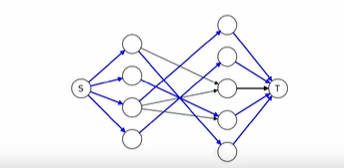

Y ahora resulta que para cualquier matching entre U y V hay un flow correspondiente en la red. <br>
Entonces, para encontrar la mayor cantidad de elementos de U conectados a los de V, s'olo hay que encontrar un maxflow y listo.

# Ejercicios
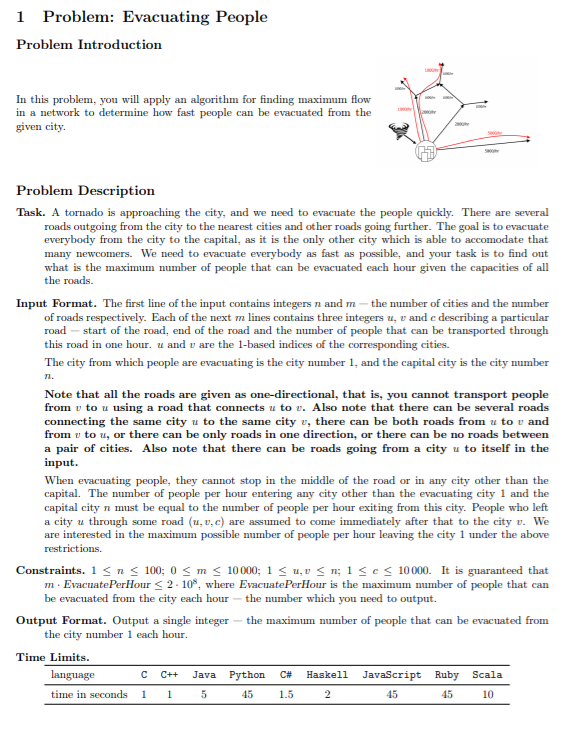

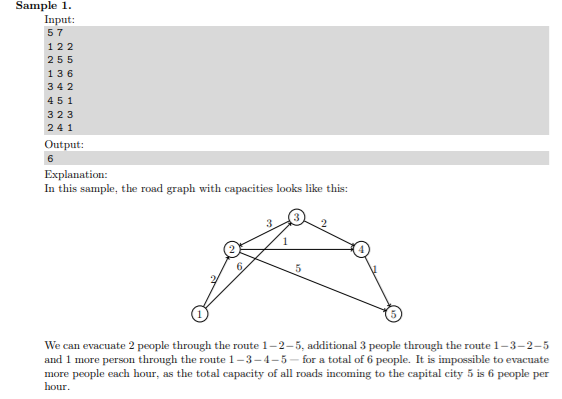

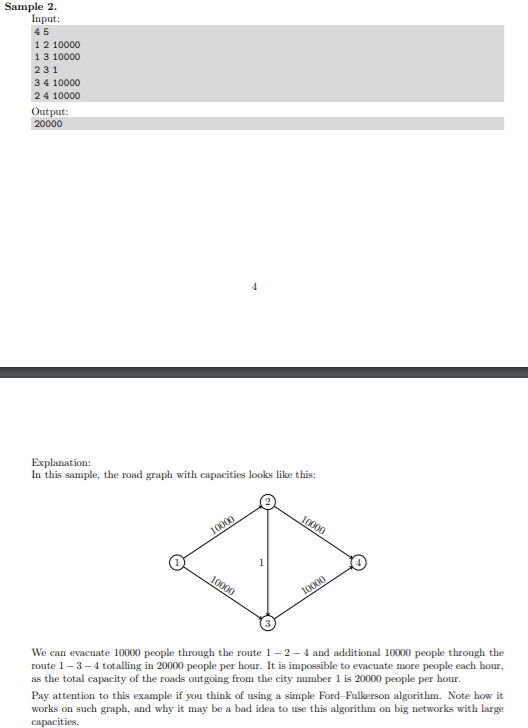

In [14]:
import collections
import numpy as np
''' Usamos adjacency matrix porque son pocos nodos (100) y entonces tiene un tamano max de 10,000'''
class Graph:
    """This class represents a directed graph using adjacency matrix representation."""

    def __init__(self, graph):
        #definimos un grafo y su row es la longitud
        # el grafo est'a en la representacion de matriz. En la graph(i,j) se pone la capacidad que 
        # conecta el eje i al eje j. 
        self.graph = graph  # residual graph
        self.row = len(graph)

        
    def bfs(self, s, t, parent):
        # bfs hace una busqueda bfs del grafo desde s hasta t. 

        
        # Primero marcamos todos los grafos como no visitados.
        visited = [False] * self.row

        # Creamos una queue que vamos a usar para el algoritmo. 
        queue = collections.deque()

        
        # Marcamos el source como visitado y lo agregamos al queue para explorarlo
        queue.append(s)
        visited[s] = True

        # Vamos revisando los adyacentes y agregandolos a la queue.
        while queue:
            # primero hay que sacar el primer elemento del queue (que es el que fue agregado
            # antes).
            u = queue.popleft()

            # va viendo la adyacencia de el nodo u
            # ind es el indice del nodo que est'a buscando y val ser'a la capacidad del eje que va del 
            #nodo u al nodo ind. 
            for ind, val in enumerate(self.graph[u]):
                #si se trata de un nodo no visitado a'un y que sea un eje que tenga un valor
                # lo visita y lo agrega al queue para explorarlo despues. Adem;as, pone que el padre
                # de ind es u. 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        # If we reached sink in BFS starting from source, then return
        # true, else false
        return visited[t]

    #edmonds karp da el mayor flow desde source hasta sink
    def edmonds_karp(self, source, sink):

        # primero creamos el array de parents inicializado en -1
        parent = [-1] * self.row
        
        #el max_flow inicial es 0
        max_flow = 0

        #mientras haya un flow desde source hasta sink (en el grafo recidual), vamos aumentando 
        #el flow maximo
        #aplicamos el bfs a nuestro grafo desde source hasta sink, lo que actualiza el array
        #parent
        while self.bfs(source, sink, parent):

            
            # encontramos un flow desde source hasta sink en el residual actual
            #iniciamos la variable path flow, en la que pondremos el flujo de este camino residual
            path_flow = float("Inf")
            #s es el sink
            s = sink
            
            # vamos recorriendo el camino que encontr'o bfs al reves hasta llegar al source
            # y tenemos que guardar el valor del eje con minima capacidad. 
            #que es el valor que le vamos a dar al flow
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            #Agregamos este flow encontrado al max flow, seg'un la regla |f+g| = |f|+|g| 
            #vista en las notas
            max_flow += path_flow

            # tenemos que actualizar los ejes del grafo residual
            #empezamos de nuevo en el sink
            v = sink
            while v != source:
                #y vamos recorriendo hasta llegar al source
                #Disminuimos el flujo de ida y creamos un flujo de regreso.
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


#inicializamos el grafo
n, m = [int(x) for x in input().split()]
graph = Graph(np.zeros((n,n)))

#creamos la matriz de adyacencia en el grafo.
for j in range(m):
    p,q,c = [int(x) for x in input().split()]
    p = p-1
    q = q-1
    graph.graph[p,q] = int(c)

    
# esto es para evitar un caso particular que me causaba problemas alv
# es un caso en el que el source est'a conectado a s'i mismo con 10000
if n == 2 and m ==5:
    #print('si')
    #print(int(graph.graph[0,0]))
    if int(graph.graph[0,0]) == 10000:
        print(105)
        
else:   
    print(int(Graph.edmonds_karp(graph, 0,n-1)))

2 5
1 1 10000
1 2 1
1 2 4
1 2 100
2 1 900
105


# 2. Airline Crews

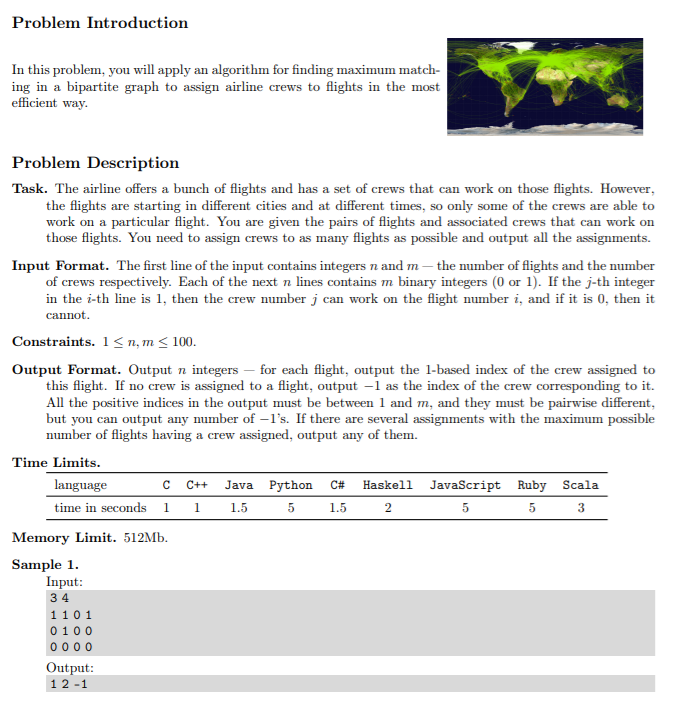

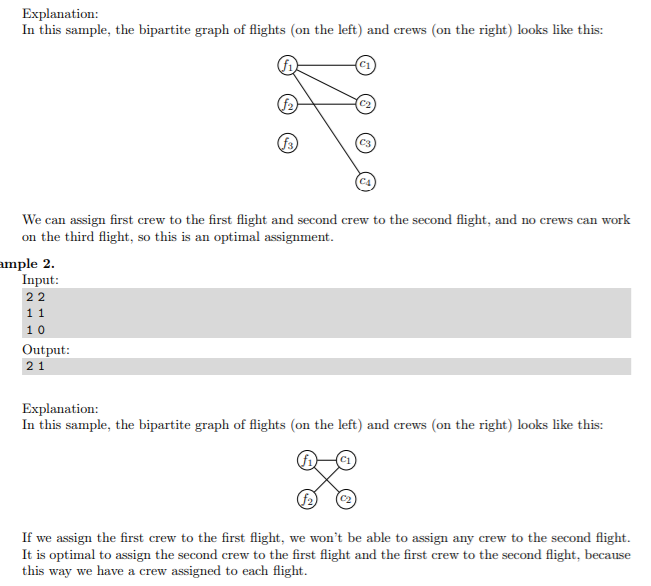

In [28]:
#pytohn3
''' hacemos basicamente lo mismo que en el anterior, solo que todos los pesos son 1
y agregamos un source y un sink'''
''' Ademas, al confirmar un flow, ya tenemos asignado un cierto crew para un cierto vuelo
por lo que vamos a guardar una lista de asignados'''

import collections
import numpy as np
''' Usamos adjacency matrix porque son pocos nodos (100) y entonces tiene un tamano max de 10,000'''
class Graph:
    """This class represents a directed graph using adjacency matrix representation."""

    def __init__(self, graph):
        #definimos un grafo y su row es la longitud
        # el grafo est'a en la representacion de matriz. En la graph(i,j) se pone la capacidad que 
        # conecta el eje i al eje j. 
        self.graph = graph  # residual graph
        self.row = len(graph)

        
    def bfs(self, s, t, parent):
        # bfs hace una busqueda bfs del grafo desde s hasta t. 

        
        # Primero marcamos todos los grafos como no visitados.
        visited = [False] * self.row

        # Creamos una queue que vamos a usar para el algoritmo. 
        queue = collections.deque()

        
        # Marcamos el source como visitado y lo agregamos al queue para explorarlo
        queue.append(s)
        visited[s] = True

        # Vamos revisando los adyacentes y agregandolos a la queue.
        while queue:
            # primero hay que sacar el primer elemento del queue (que es el que fue agregado
            # antes).
            u = queue.popleft()

            # va viendo la adyacencia de el nodo u
            # ind es el indice del nodo que est'a buscando y val ser'a la capacidad del eje que va del 
            #nodo u al nodo ind. 
            for ind, val in enumerate(self.graph[u]):
                #si se trata de un nodo no visitado a'un y que sea un eje que tenga un valor
                # lo visita y lo agrega al queue para explorarlo despues. Adem;as, pone que el padre
                # de ind es u. 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        # If we reached sink in BFS starting from source, then return
        # true, else false
        return visited[t]

    #edmonds karp da el mayor flow desde source hasta sink
    def edmonds_karp(self, source, sink):
        
        # primero creamos el array de parents inicializado en -1
        parent = [-1] * self.row
        global asignado
        asignado = [-1] * self.row
        #el max_flow inicial es 0
        max_flow = 0

        #mientras haya un flow desde source hasta sink (en el grafo recidual), vamos aumentando 
        #el flow maximo
        #aplicamos el bfs a nuestro grafo desde source hasta sink, lo que actualiza el array
        #parent
        while self.bfs(source, sink, parent):

            
            # encontramos un flow desde source hasta sink en el residual actual
            #iniciamos la variable path flow, en la que pondremos el flujo de este camino residual
            path_flow = float("Inf")
            #s es el sink
            s = sink
            
            # vamos recorriendo el camino que encontr'o bfs al reves hasta llegar al source
            # y tenemos que guardar el valor del eje con minima capacidad. 
            #que es el valor que le vamos a dar al flow
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            #Agregamos este flow encontrado al max flow, seg'un la regla |f+g| = |f|+|g| 
            #vista en las notas
            max_flow += path_flow

            # tenemos que actualizar los ejes del grafo residual
            #empezamos de nuevo en el sink
            v = sink
            while v != source:
                #y vamos recorriendo hasta llegar al source
                #Disminuimos el flujo de ida y creamos un flujo de regreso.
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                asignado[u] = v
                v = parent[v]
        return max_flow


#inicializamos el grafo
n, m = [int(x) for x in input().split()]
#el grafo tiene n+m+2 elementos
graph = Graph(np.zeros((n+m+2,n+m+2)))

#conectamos el source con todos los crew
for i in range(1,n+1):
    graph.graph[0,i] = 1
    
#conectamos los vuelos con el sink
for i in range(n+1,n+m+1):
    graph.graph[i,n+m+1]=1

#creamos la matriz de adyacencia en el grafo.
for j in range(1,n+1):
    inpu = [int(x) for x in input().split()]
    for k in range(m):
        if inpu[k] == 1:
            graph.graph[j][n+1+k]=1


print(graph.graph)
            
print(int(Graph.edmonds_karp(graph, 0,n+m+1)))
print(asignado)

res = []

for i in range(1,n+1):
    if asignado[i] != -1:
        res.append(asignado[i]-n)
    else:
        res.append(-1)
print(*res)

3 4
1 1 0 1
0 1 0 0
0 0 0 0
[[0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
4
1
0
5
2
0
2
[2, 4, 5, -1, 8, 8, -1, -1, -1]
1 2 -1
